In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, IsolationForest


import ast
import numpy as np
import matplotlib.pyplot as plt
import nbimporter
import nbformat
from Data import train_test_split_for_data

In [8]:
x_train, x_test, y_train, y_test = train_test_split_for_data('../Data/HDFS_v1/Processed_data/processed_labeled_data.csv', 0.3)

In [2]:
x_train.iloc[0]

NameError: name 'x_train' is not defined

## Baseline model 1: Logistic regression

c:\Users\mathb\Python\envs\diplomamunka\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.991433
Precision: 1.00000000
Recall: 0.98108998
F1-Score: 0.99045474


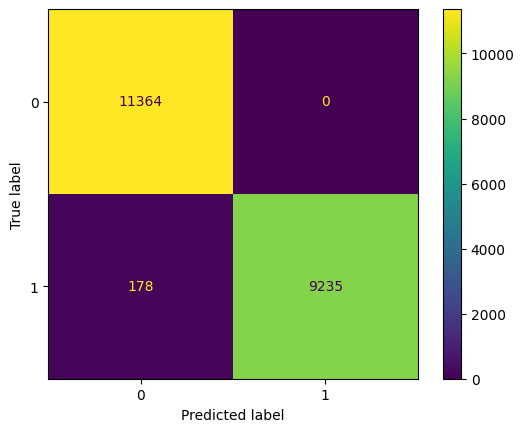

In [3]:

# Step 1: Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Step 2: Make predictions on the test set
y_pred = model.predict(x_test)

# Step 3: Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# (Optional) Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")

precision = (cm[1,1]) / (cm[1,1] + cm[0,1])
recall = (cm[1,1]) / (cm[1,1] + cm[1,0])
f_score = 2*precision*recall / (precision+recall)
print(f"Precision: {precision:.8f}")
print(f"Recall: {recall:.8f}")
print(f"F1-Score: {f_score:.8f}")

## Baseline model 2: decision tree

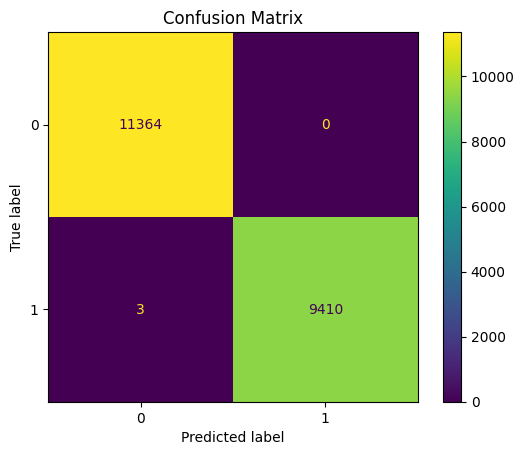

[[11364     0]
 [    3  9410]]
Precision: 1.00000000
Recall: 0.99968129
F1-Score: 0.99984062
Features sorted by importance:
         Feature  Importance
17    feature_18    0.593079
254  feature_255    0.276107
210  feature_211    0.053194
246  feature_247    0.028469
45    feature_46    0.019622
..           ...         ...
21    feature_22    0.000000
22    feature_23    0.000000
23    feature_24    0.000000
24    feature_25    0.000000
473  feature_474    0.000000

[474 rows x 2 columns]


In [4]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix")
plt.show()
print(cm)
feature_importances = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': model.feature_importances_
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
precision = (cm[1,1]) / (cm[1,1] + cm[0,1])
recall = (cm[1,1]) / (cm[1,1] + cm[1,0])
f_score = 2*precision*recall / (precision+recall)
print(f"Precision: {precision:.8f}")
print(f"Recall: {recall:.8f}")
print(f"F1-Score: {f_score:.8f}")
print("Features sorted by importance:")
print(feature_importances)


In [23]:
log_templates_df = pd.read_csv('../Data/HDFS_v1/Processed_data/log_templates.csv')
print(log_templates_df['EventTemplate'].iloc[3])
print(log_templates_df['EventTemplate'].iloc[32])
print(log_templates_df['EventTemplate'].iloc[4])
print(log_templates_df['EventTemplate'].iloc[31])
print(log_templates_df['EventTemplate'].iloc[20])



Received block <*> of size <*> from /<*>
Unexpected error trying to delete block <*>. BlockInfo not found in volumeMap.
BLOCK* NameSystem.addStoredBlock: blockMap updated: <*>:50010 is added to <*> size <*>
BLOCK* NameSystem.delete: <*> is added to invalidSet of <*>:50010
BLOCK* NameSystem.addStoredBlock: Redundant addStoredBlock request received for <*> on <*>:50010 size <*>


## RandomForest

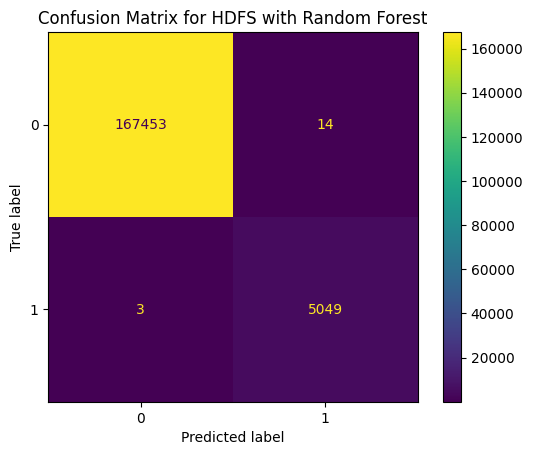

Precision: 0.99723484
Recall: 0.99940618
F1-Score: 0.99831933
Features sorted by importance:
       Feature    Importance
32  feature_33  2.752516e-01
4    feature_5  1.363016e-01
3    feature_4  1.053289e-01
2    feature_3  9.212445e-02
0    feature_1  7.743091e-02
16  feature_17  5.700809e-02
20  feature_21  5.600034e-02
33  feature_34  3.030172e-02
17  feature_18  2.791628e-02
31  feature_32  2.614891e-02
5    feature_6  2.238023e-02
15  feature_16  2.064013e-02
6    feature_7  2.050892e-02
10  feature_11  1.822098e-02
11  feature_12  1.624253e-02
34  feature_35  7.659772e-03
9   feature_10  7.029080e-03
12  feature_13  1.124411e-03
8    feature_9  5.562475e-04
41  feature_42  3.682079e-04
7    feature_8  3.559826e-04
24  feature_25  2.381946e-04
18  feature_19  1.504373e-04
19  feature_20  1.407519e-04
23  feature_24  8.646114e-05
13  feature_14  6.840501e-05
21  feature_22  6.836554e-05
29  feature_30  6.784573e-05
45  feature_46  6.666466e-05
30  feature_31  5.697246e-05
25  feat

In [9]:
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(x_train, y_train)

# Step 2: Make predictions on the test set
y_pred = model.predict(x_test)

# Step 3: Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix for HDFS with Random Forest")
plt.savefig('../Figures/EDA/HDFS_randomforest_cm_100tree.png', dpi=300, bbox_inches='tight')  # Save the plot

plt.show()

# Step 4: Print features in descending order of importance
feature_importances = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': model.feature_importances_
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

precision = (cm[1,1]) / (cm[1,1] + cm[0,1])
recall = (cm[1,1]) / (cm[1,1] + cm[1,0])
f_score = 2*precision*recall / (precision+recall)
print(f"Precision: {precision:.8f}")
print(f"Recall: {recall:.8f}")
print(f"F1-Score: {f_score:.8f}")
print("Features sorted by importance:")
print(feature_importances)


In [31]:
print(log_templates_df['EventTemplate'].iloc[32])
print(log_templates_df['EventTemplate'].iloc[4])
print(log_templates_df['EventTemplate'].iloc[3])
print(log_templates_df['EventTemplate'].iloc[2])
print(log_templates_df['EventTemplate'].iloc[0])
print(log_templates_df['EventTemplate'].iloc[16])
print(log_templates_df['EventTemplate'].iloc[20])

Unexpected error trying to delete block <*>. BlockInfo not found in volumeMap.
BLOCK* NameSystem.addStoredBlock: blockMap updated: <*>:50010 is added to <*> size <*>
Received block <*> of size <*> from /<*>
PacketResponder <*> for block <*> <*>
Receiving block <*> src: <*> dest: /<*>:50010
Deleting block <*> file <*>
BLOCK* NameSystem.addStoredBlock: Redundant addStoredBlock request received for <*> on <*>:50010 size <*>


## XGBoost method

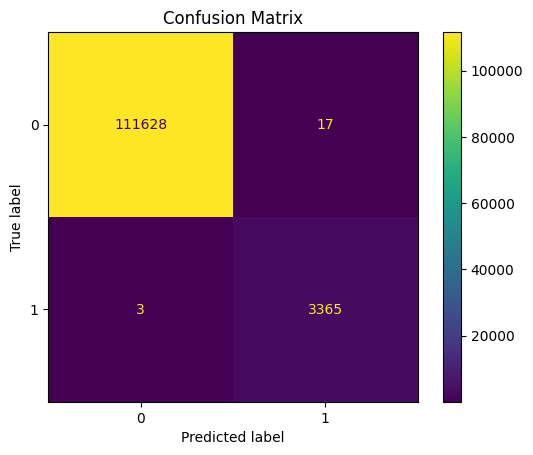

Precision: 0.99497339
Recall: 0.99910926
F1-Score: 0.99703704
Features sorted by importance:
       Feature    Importance
3    feature_4  3.148280e-01
32  feature_33  2.553864e-01
16  feature_17  1.273764e-01
4    feature_5  1.230200e-01
20  feature_21  6.499558e-02
33  feature_34  4.421212e-02
31  feature_32  3.810193e-02
17  feature_18  1.435541e-02
9   feature_10  6.248629e-03
34  feature_35  2.641165e-03
12  feature_13  1.871724e-03
0    feature_1  1.788407e-03
41  feature_42  1.425371e-03
5    feature_6  1.220818e-03
6    feature_7  9.363620e-04
7    feature_8  5.377902e-04
30  feature_31  2.545042e-04
8    feature_9  2.427962e-04
29  feature_30  1.905999e-04
10  feature_11  1.777110e-04
11  feature_12  1.113465e-04
45  feature_46  7.700822e-05
27  feature_28  5.854492e-10
25  feature_26  2.735940e-10
2    feature_3  1.395206e-10
15  feature_16  1.106828e-17
1    feature_2  0.000000e+00
13  feature_14  0.000000e+00
14  feature_15  0.000000e+00
23  feature_24  0.000000e+00
21  feat

In [34]:
model = GradientBoostingClassifier(loss = 'log_loss', learning_rate=0.1, n_estimators=100)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix")
plt.show()

# Step 4: Print features in descending order of importance
feature_importances = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': model.feature_importances_
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

precision = (cm[1,1]) / (cm[1,1] + cm[0,1])
recall = (cm[1,1]) / (cm[1,1] + cm[1,0])
f_score = 2*precision*recall / (precision+recall)
print(f"Precision: {precision:.8f}")
print(f"Recall: {recall:.8f}")
print(f"F1-Score: {f_score:.8f}")
print("Features sorted by importance:")
print(feature_importances)


## Isolation Forest

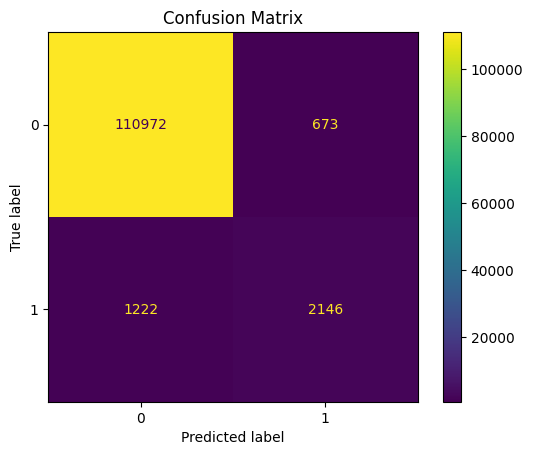

Precision: 0.76126286
Recall: 0.63717340
F1-Score: 0.69371262


In [39]:
model = IsolationForest(random_state=21, contamination = 0.03)
model.fit(x_train)

y_pred = model.predict(x_test)
y_pred = [0 if pred == 1 else 1 for pred in y_pred]

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix")
plt.show()

precision = (cm[1,1]) / (cm[1,1] + cm[0,1])
recall = (cm[1,1]) / (cm[1,1] + cm[1,0])
f_score = 2*precision*recall / (precision+recall)
print(f"Precision: {precision:.8f}")
print(f"Recall: {recall:.8f}")
print(f"F1-Score: {f_score:.8f}")


## AutoEncoder